In [1]:
import numpy as np
import re

In [2]:
corpus = [
    "Cats and dogs are common household pets",
    "Dogs are loyal animals and love playing with humans",
    "Cats are independent animals and enjoy sleeping",
    "Mouse and cheese are often used in cartoons",
    "A mouse likes cheese and hides from cats",
    "Cheese is made from milk and loved by many animals",
]

In [3]:
corpus

['Cats and dogs are common household pets',
 'Dogs are loyal animals and love playing with humans',
 'Cats are independent animals and enjoy sleeping',
 'Mouse and cheese are often used in cartoons',
 'A mouse likes cheese and hides from cats',
 'Cheese is made from milk and loved by many animals']

In [4]:
# clearing and tokenizing
l_A = corpus[0].lower().split()
l_B = corpus[1].lower().split()
l_C = corpus[2].lower().split()

# Calculating bag of words
word_set = set(l_A).union(set(l_B)).union(set(l_C))

word_dict_A = dict.fromkeys(word_set, 0)
word_dict_B = dict.fromkeys(word_set, 0)
word_dict_C = dict.fromkeys(word_set, 0)

for word in l_A:
    word_dict_A[word] += 1

for word in l_B:
    word_dict_B[word] += 1

for word in l_C:
    word_dict_C[word] += 1

In [5]:
word_dict_A

{'playing': 0,
 'sleeping': 0,
 'love': 0,
 'and': 1,
 'animals': 0,
 'household': 1,
 'humans': 0,
 'pets': 1,
 'common': 1,
 'dogs': 1,
 'with': 0,
 'loyal': 0,
 'enjoy': 0,
 'independent': 0,
 'cats': 1,
 'are': 1}

In [7]:
def compute_tf(word_dict, l):
    tf = {}
    sum_nk = len(l)
    for word, count in word_dict.items():
        tf[word] = count/sum_nk
    return tf
  
tf_A = compute_tf(word_dict_A, l_A)
tf_B = compute_tf(word_dict_B, l_B)
tf_C = compute_tf(word_dict_C, l_C)

In [8]:
tf_A

{'playing': 0.0,
 'sleeping': 0.0,
 'love': 0.0,
 'and': 0.14285714285714285,
 'animals': 0.0,
 'household': 0.14285714285714285,
 'humans': 0.0,
 'pets': 0.14285714285714285,
 'common': 0.14285714285714285,
 'dogs': 0.14285714285714285,
 'with': 0.0,
 'loyal': 0.0,
 'enjoy': 0.0,
 'independent': 0.0,
 'cats': 0.14285714285714285,
 'are': 0.14285714285714285}

In [9]:
tf_B

{'playing': 0.1111111111111111,
 'sleeping': 0.0,
 'love': 0.1111111111111111,
 'and': 0.1111111111111111,
 'animals': 0.1111111111111111,
 'household': 0.0,
 'humans': 0.1111111111111111,
 'pets': 0.0,
 'common': 0.0,
 'dogs': 0.1111111111111111,
 'with': 0.1111111111111111,
 'loyal': 0.1111111111111111,
 'enjoy': 0.0,
 'independent': 0.0,
 'cats': 0.0,
 'are': 0.1111111111111111}

In [10]:
tf_C

{'playing': 0.0,
 'sleeping': 0.14285714285714285,
 'love': 0.0,
 'and': 0.14285714285714285,
 'animals': 0.14285714285714285,
 'household': 0.0,
 'humans': 0.0,
 'pets': 0.0,
 'common': 0.0,
 'dogs': 0.0,
 'with': 0.0,
 'loyal': 0.0,
 'enjoy': 0.14285714285714285,
 'independent': 0.14285714285714285,
 'cats': 0.14285714285714285,
 'are': 0.14285714285714285}

In [11]:
def compute_idf(strings_list):
    n = len(strings_list)
    idf = dict.fromkeys(strings_list[0].keys(), 0)
    for l in strings_list:
        for word, count in l.items():
            if count > 0:
                idf[word] += 1
    
    for word, v in idf.items():
        idf[word] = np.log(n / float(v))
    return idf
    
idf = compute_idf([word_dict_A, word_dict_B, word_dict_C])
idf

{'playing': np.float64(1.0986122886681098),
 'sleeping': np.float64(1.0986122886681098),
 'love': np.float64(1.0986122886681098),
 'and': np.float64(0.0),
 'animals': np.float64(0.4054651081081644),
 'household': np.float64(1.0986122886681098),
 'humans': np.float64(1.0986122886681098),
 'pets': np.float64(1.0986122886681098),
 'common': np.float64(1.0986122886681098),
 'dogs': np.float64(0.4054651081081644),
 'with': np.float64(1.0986122886681098),
 'loyal': np.float64(1.0986122886681098),
 'enjoy': np.float64(1.0986122886681098),
 'independent': np.float64(1.0986122886681098),
 'cats': np.float64(0.4054651081081644),
 'are': np.float64(0.0)}

In [12]:
def compute_tf_idf(tf, idf):
    tf_idf = dict.fromkeys(tf.keys(), 0)
    for word, v in tf.items():
        tf_idf[word] = v * idf[word]
    return tf_idf
    
tf_idf_A = compute_tf_idf(tf_A, idf)
tf_idf_B = compute_tf_idf(tf_B, idf)
tf_idf_C = compute_tf_idf(tf_C, idf)

In [13]:
tf_idf_A

{'playing': np.float64(0.0),
 'sleeping': np.float64(0.0),
 'love': np.float64(0.0),
 'and': np.float64(0.0),
 'animals': np.float64(0.0),
 'household': np.float64(0.15694461266687282),
 'humans': np.float64(0.0),
 'pets': np.float64(0.15694461266687282),
 'common': np.float64(0.15694461266687282),
 'dogs': np.float64(0.05792358687259491),
 'with': np.float64(0.0),
 'loyal': np.float64(0.0),
 'enjoy': np.float64(0.0),
 'independent': np.float64(0.0),
 'cats': np.float64(0.05792358687259491),
 'are': np.float64(0.0)}

In [14]:
tf_idf_B

{'playing': np.float64(0.12206803207423442),
 'sleeping': np.float64(0.0),
 'love': np.float64(0.12206803207423442),
 'and': np.float64(0.0),
 'animals': np.float64(0.04505167867868493),
 'household': np.float64(0.0),
 'humans': np.float64(0.12206803207423442),
 'pets': np.float64(0.0),
 'common': np.float64(0.0),
 'dogs': np.float64(0.04505167867868493),
 'with': np.float64(0.12206803207423442),
 'loyal': np.float64(0.12206803207423442),
 'enjoy': np.float64(0.0),
 'independent': np.float64(0.0),
 'cats': np.float64(0.0),
 'are': np.float64(0.0)}

In [15]:
tf_idf_C

{'playing': np.float64(0.0),
 'sleeping': np.float64(0.15694461266687282),
 'love': np.float64(0.0),
 'and': np.float64(0.0),
 'animals': np.float64(0.05792358687259491),
 'household': np.float64(0.0),
 'humans': np.float64(0.0),
 'pets': np.float64(0.0),
 'common': np.float64(0.0),
 'dogs': np.float64(0.0),
 'with': np.float64(0.0),
 'loyal': np.float64(0.0),
 'enjoy': np.float64(0.15694461266687282),
 'independent': np.float64(0.15694461266687282),
 'cats': np.float64(0.05792358687259491),
 'are': np.float64(0.0)}

In [17]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)  # إزالة كل شيء غير الحروف
    text = re.sub(r'\s+', ' ', text)       # إزالة المسافات الزائدة
    return text.strip()

clean_text = [preprocessing(doc) for doc in all_text]

In [18]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.8,
    min_df=1
)

X = vectorizer.fit_transform(clean_text)

In [19]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

In [20]:
for i, doc in enumerate(all_text):
    print(f"Document {i+1} -> Cluster {labels[i]}")

Document 1 -> Cluster 2
Document 2 -> Cluster 2
Document 3 -> Cluster 2
Document 4 -> Cluster 2
Document 5 -> Cluster 0
Document 6 -> Cluster 2
Document 7 -> Cluster 1
Document 8 -> Cluster 2
Document 9 -> Cluster 1
Document 10 -> Cluster 2
Document 11 -> Cluster 0
Document 12 -> Cluster 1
Document 13 -> Cluster 1


In [21]:
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print(f"\nCluster {i}:")
    top_indices = kmeans.cluster_centers_[i].argsort()[-6:]
    print([terms[j] for j in top_indices])


Cluster 0:
['increases', 'modeling', 'mining', 'value', 'text', 'user']

Cluster 1:
['collection', 'offset', 'corpus', 'document', 'frequency', 'word']

Cluster 2:
['statistic', 'ios', 'better', 'guide', 'android', 'google']


In [22]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

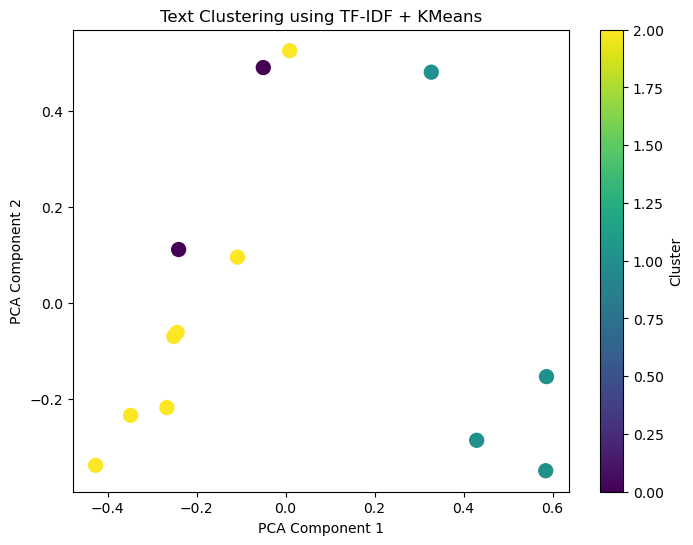

In [23]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=labels,
    cmap='viridis',
    s=100
)

plt.title("Text Clustering using TF-IDF + KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [25]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
tfidf = tfidf_vectorizer.fit_transform(all_text)

kmeans = KMeans(n_clusters=2).fit(tfidf)

In [26]:
# lines_for_predicting = ["tf and idf is awesome!", "some androids is there"]
lines_for_predicting = ["tf and idf is awesome!", "Selling Your Soul to Google"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))


array([0, 1], dtype=int32)